In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##1.

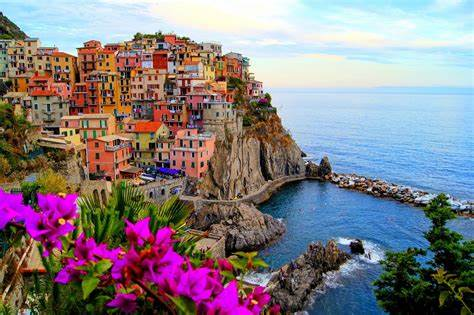

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img = cv2.imread("CinqueTerre.jpg")
cv2_imshow(img)

###a)

In [ ]:
print("size of the image:",img.size)
print("dimension of the image:",img.shape," number of channels:",img.shape[-1])

size of the image: 447930
dimension of the image: (315, 474, 3)  number of channels: 3


###b)

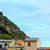

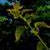

In [ ]:
subimg1 = img[0:50,0:50]
cv2_imshow(subimg1)
print("\n")
subimg2 = img[-50:,-50:]
cv2_imshow(subimg2)

In [ ]:
SSD = np.sum((subimg1 - subimg2)**2)
print("SSD of the intensities between the subimages:", SSD)

SSD of the intensities between the subimages: 781484


##2.

###a)

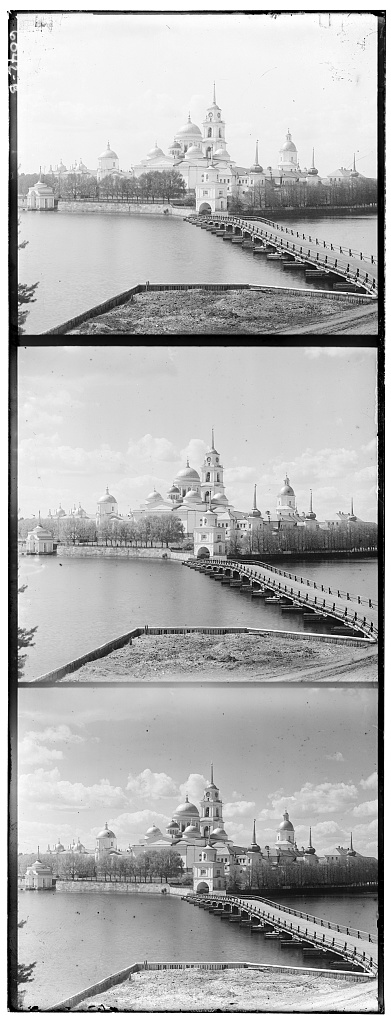

In [ ]:
img2 = cv2.imread("monastery.jpg")
cv2_imshow(img2)

In [ ]:
img2.shape

(1024, 391, 3)

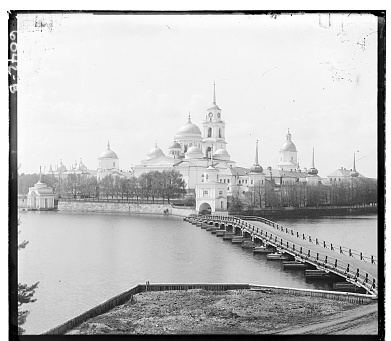

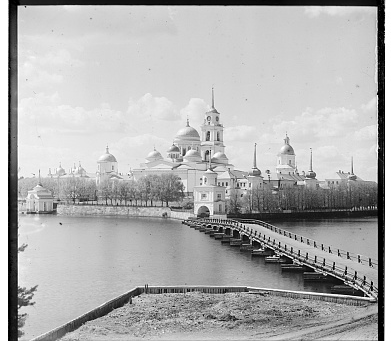

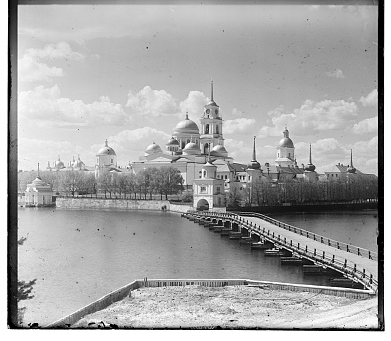

In [ ]:
div = img2.shape[0]//3
img2_B = img2[:div,:,:]
img2_G = img2[div:2*div,:,:]
img2_R = img2[2*div+1:,:,:]
cv2_imshow(img2_B)
print("\n")
cv2_imshow(img2_G)
print("\n")
cv2_imshow(img2_R)

In [ ]:
def ssd(img1, img2):
  return np.sum((img1 - img2)**2)

In [ ]:
def minssd(img1, img2):
  ssd_init = float('inf')
  for i in range(-5, 6):
    for j in range(-5, 6):
      img2_new = np.roll(np.roll(img2, i, axis = 0), j, axis = 1)
      ssd_tmp = ssd(img1, img2_new)
      if(ssd_tmp<ssd_init):
        ax1 = i
        ax2 = j
        ssd_init = ssd_tmp
        fin_img = img2_new
  return [ax1, ax2, ssd_init]

###b)

In [ ]:
minssd(img2_B,img2_G)

[-3, 1, 39710733]

The best SSD value for the Green channel is 39710733 and the displacement vector is (-3, 1)

In [ ]:
minssd(img2_B,img2_R)

[5, 1, 41768268]

The best SSD value for the Red channel is 41768268 and the displacement vector is (5, 1)

###c) & d)

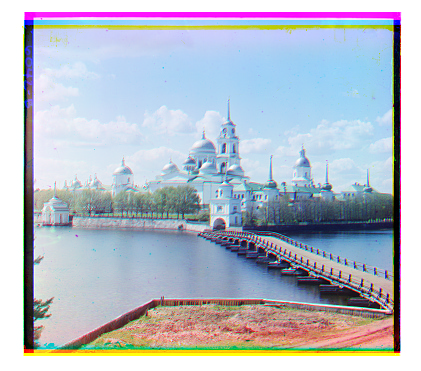

In [ ]:
trans_G_ax1, trans_G_ax2 = minssd(img2_B,img2_G)[:2]
trans_R_ax1, trans_R_ax2 = minssd(img2_B,img2_R)[:2]

H = img2_B.shape[0]
W = img2_B.shape[1]

aligned_image = 255*np.ones((H+30,W+30,3), np.uint8)
aligned_image[15:H+15, 15:W+15, 0] = img2_B[:,:,0]
aligned_image[15+trans_G_ax1:H+15+trans_G_ax1, 15+trans_G_ax2:W+15+trans_G_ax2, 1] = img2_G[:,:,1]
aligned_image[15+trans_R_ax1:H+15+trans_R_ax1, 15+trans_R_ax2:W+15+trans_R_ax2, 2] = img2_R[:,:,2]

cv2_imshow(aligned_image)